In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification, make_blobs

In [122]:
X, y = make_blobs(n_samples=5000,
                 n_features=2,
                 centers=3,
                 cluster_std=2.2)

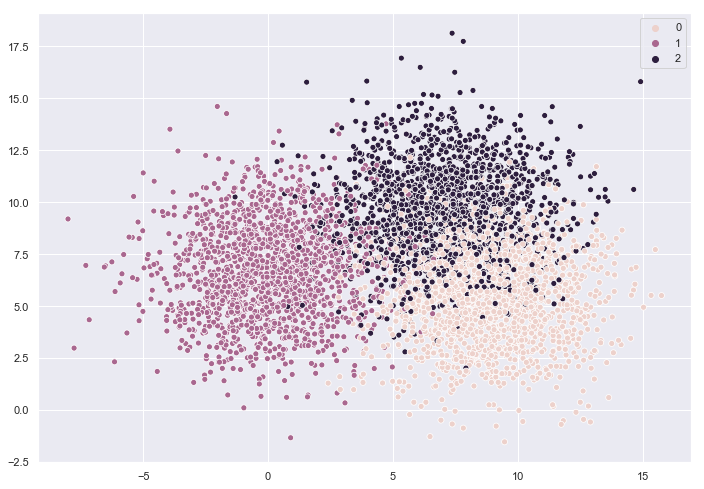

In [123]:
sns.scatterplot(X[:,0], X[:,1], hue=y);

In [124]:
def p(X, sample):
    return np.sqrt(np.sum((X-sample)**2, 1))

In [143]:
TRAIN_SIZE = 0.8

N_SAMPLES = len(y)
TRAIN_IDX = int(N_SAMPLES * TRAIN_SIZE)
    
x_train, x_val = X[:TRAIN_IDX], X[:TRAIN_IDX]
y_train, y_val = y[:TRAIN_IDX], y[:TRAIN_IDX]

def knn(x_train, x_val, y_train, y_val, K=2, train_size=0.8, predict_proba=False):
    test_size = 1 - train_size
    
    y_pred = np.zeros((len(y_val), 3))
    
    for i in range(len(y_val)):
        metrics = p(x_train, x_val[i])
        k_nearest_idx = metrics.argsort()[:K]
        y_pred[i] = np.bincount(y_train[k_nearest_idx], minlength=3) / K
        
    #sns.scatterplot(x_val[:,0], x_val[:,1], hue=np.argmax(y_pred, 1));
    
    if predict_proba:
        return y_pred
    else:
        return np.argmax(y_pred, 1)

In [171]:
def test_knn(nn=15):
    
    acc = np.zeros(nn-1)

    for i in range(2, nn+1):
        y_pred = knn(x_train, x_val, y_train, y_val, i)
        acc[i-2] = np.sum(y_val==y_pred) / len(y_val)
    
    #print(acc)
    plt.plot(np.arange(2, nn+1), acc)
    
    return acc

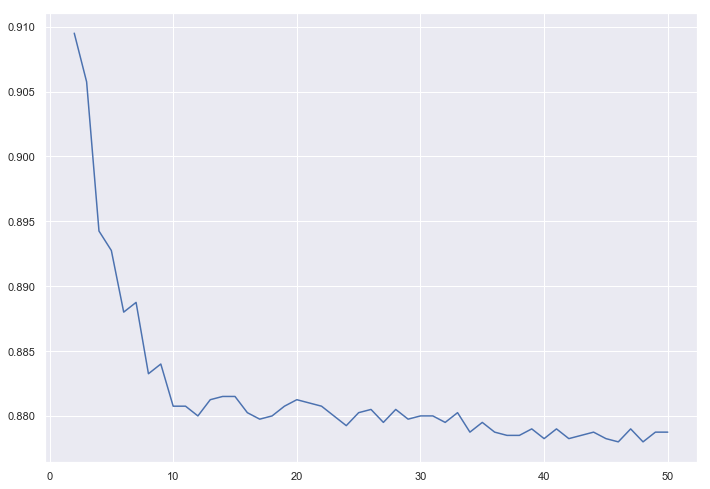

In [172]:
accs = test_knn(50)